# Market Basket Analysis

**West end Retail Supermarket** has approached you as a data mining specialist to give them some insights from their day to day transaction data. Using the skills that you have give them some insights pertaining to the following. 

1. What are the products that sell fastest ? [5]
2. What times of the day can we bring more till operators to the tills ? [5]
3. Which items are frequently being bought together ? [5]
4. Using the principle of association rules in the form of A -> B, show the transactions or rules where A and B are 3 times more likely to be bought together than B to be bought alone. [5]
5. Using the principle of association rules in the form of A->B, show the rules where you have 100% confidence that if A is bought then B will be bought also [5]
6. Finally which items can be put on the same shelf so that it becomes easy for our customers to pick items which they frequently buy together ? [5]

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Collection

### Load the Data

In [ ]:
path = '/content/drive/MyDrive/Y4_T2/Data Mining/Market Basket Analysis/'

In [ ]:
overview = pd.read_excel(open(path+'COLUMN SAMPLES.xlsx', 'rb'), sheet_name='Sheet1') 

In [ ]:
data = pd.read_csv(path+'West_End.csv', on_bad_lines='skip') 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Preview the Data

In [ ]:
overview

,Date and Time,Till Number,Cashier,Trans No,Product Code,Product Name,Bar Code,Sales VALUE,Quantity Sold,Unit Price
0,2019-12-08 06:02:47,4.0,5009.0,2.0,2041.0,LOBELS PRIME WHITE LOAF,6.008022e+11,6.00,1.000,6.000000
1,2019-12-08 06:02:47,4.0,5009.0,2.0,2041.0,LOBELS PRIME WHITE LOAF,6.008022e+11,6.00,1.000,6.000000
2,2019-12-08 06:02:55,8.0,5030.0,2.0,10652.0,FW PLASTIC BAG,0.000000e+00,0.70,1.000,0.700000
3,2019-12-08 06:02:55,8.0,5030.0,2.0,2041.0,LOBELS PRIME WHITE LOAF,6.008022e+11,6.00,1.000,6.000000
4,2019-12-08 06:02:55,8.0,5030.0,2.0,2041.0,LOBELS PRIME WHITE LOAF,6.008022e+11,6.00,1.000,6.000000
5,2019-12-08 06:03:50,4.0,5009.0,3.0,2041.0,LOBELS PRIME WHITE LOAF,6.008022e+11,6.00,1.000,6.000000
6,2019-12-08 06:03:50,4.0,5009.0,3.0,2339.0,CHIBUKU SUPER 1.25L,6.319630e+10,7.00,1.000,7.000000
7,2019-12-08 06:04:44,8.0,5030.0,3.0,2041.0,LOBELS PRIME WHITE LOAF,6.008022e+11,6.00,1.000,6.000000
8,2019-12-08 06:04:59,4.0,5009.0,4.0,2057.0,BAKERS INN WHITE LOAF,6.009802e+11,6.00,1.000,6.000000
9,2019-12-08 06:06:05,8.0,5030.0,4.0,2065.0,BAKERS INN BROWN LOAF,6.009802e+11,6.00,1.000,6.000000


In [ ]:
data.head(5)

,FW WESTEND,PLU Transaction Audit Report,Page -1 of 1,Start Date,19-Jan-01,End Date,19-Dec-31,Date,Till No,Cashier,Tran No,Product,Barcode,Sales,Qty,Sold,Unnamed: 16,30-Jan-17 18:49:19,11,2042,67,2254,EAGLE LAGER QUART 750ML,0063196300104,0.96,1.000,Report Totals,"42,280,256.75","4,846,597.18",POSPLUTransactionAudit.rpt,Printed By EUNICE,06-Feb-20,13:08:19
0,FW WESTEND,PLU Transaction Audit Report,Page -1 of 1,Start Date,19-Jan-01,End Date,19-Dec-31,Date,Till No,Cashier,Tran No,Product,Barcode,Sales,Qty,Sold,30-Jan-17 18:49:19,11,2042,67,2871,EMPTY BOTTLE DEPOSIT 750ML/660ML,2,0.4,1.0,Report Totals,"42,280,256.75","4,846,597.18",POSPLUTransactionAudit.rpt,Printed By EUNICE,06-Feb-20,13:08:19,NaN
1,FW WESTEND,PLU Transaction Audit Report,Page -1 of 1,Start Date,19-Jan-01,End Date,19-Dec-31,Date,Till No,Cashier,Tran No,Product,Barcode,Sales,Qty,Sold,30-Jan-17 18:49:19,11,2042,67,2339,CHIBUKU SUPER 1.25L,63196300139,1.0,1.0,Report Totals,"42,280,256.75","4,846,597.18",POSPLUTransactionAudit.rpt,Printed By EUNICE,06-Feb-20,13:08:19,NaN
2,FW WESTEND,PLU Transaction Audit Report,Page -1 of 1,Start Date,19-Jan-01,End Date,19-Dec-31,Date,Till No,Cashier,Tran No,Product,Barcode,Sales,Qty,Sold,16-Feb-17 18:38:13,11,2040,193,776,LEBENA LOOSE BISCUITS 500G,600703700019,1.18,1.0,Report Totals,"42,280,256.75","4,846,597.18",POSPLUTransactionAudit.rpt,Printed By EUNICE,06-Feb-20,13:08:19,NaN
3,FW WESTEND,PLU Transaction Audit Report,Page -1 of 1,Start Date,19-Jan-01,End Date,19-Dec-31,Date,Till No,Cashier,Tran No,Product,Barcode,Sales,Qty,Sold,16-Feb-17 18:38:13,11,2040,193,2393,CHATEAU BRANDY 200ML,600761600061,2.05,1.0,Report Totals,"42,280,256.75","4,846,597.18",POSPLUTransactionAudit.rpt,Printed By EUNICE,06-Feb-20,13:08:19,NaN
4,FW WESTEND,PLU Transaction Audit Report,Page -1 of 1,Start Date,19-Jan-01,End Date,19-Dec-31,Date,Till No,Cashier,Tran No,Product,Barcode,Sales,Qty,Sold,26-Feb-17 18:40:49,11,2066,95,2449,SHOTTS CANE SPIRIT PET 375ML,600980141508,2.17,1.0,Report Totals,"42,280,256.75","4,846,597.18",POSPLUTransactionAudit.rpt,Printed By EUNICE,06-Feb-20,13:08:19,NaN


In [ ]:
data.tail(5)

,FW WESTEND,PLU Transaction Audit Report,Page -1 of 1,Start Date,19-Jan-01,End Date,19-Dec-31,Date,Till No,Cashier,Tran No,Product,Barcode,Sales,Qty,Sold,Unnamed: 16,30-Jan-17 18:49:19,11,2042,67,2254,EAGLE LAGER QUART 750ML,0063196300104,0.96,1.000,Report Totals,"42,280,256.75","4,846,597.18",POSPLUTransactionAudit.rpt,Printed By EUNICE,06-Feb-20,13:08:19
2918019,FW WESTEND,PLU Transaction Audit Report,Page -1 of 1,Start Date,19-Jan-01,End Date,19-Dec-31,Date,Till No,Cashier,Tran No,Product,Barcode,Sales,Qty,Sold,06-Feb-20 13:04:29,2,2125,87,2057,BAKERS INN WHITE LOAF,600980179207,18.45,1.000,Report Totals,"42,280,256.75","4,846,597.18",POSPLUTransactionAudit.rpt,Printed By EUNICE,06-Feb-20,13:08:19,NaN
2918020,FW WESTEND,PLU Transaction Audit Report,Page -1 of 1,Start Date,19-Jan-01,End Date,19-Dec-31,Date,Till No,Cashier,Tran No,Product,Barcode,Sales,Qty,Sold,06-Feb-20 13:04:29,2,2125,87,497,STEWED POTATOES /KG,212077000000,9.12,0.228,Report Totals,"42,280,256.75","4,846,597.18",POSPLUTransactionAudit.rpt,Printed By EUNICE,06-Feb-20,13:08:19,NaN
2918021,FW WESTEND,PLU Transaction Audit Report,Page -1 of 1,Start Date,19-Jan-01,End Date,19-Dec-31,Date,Till No,Cashier,Tran No,Product,Barcode,Sales,Qty,Sold,06-Feb-20 13:04:29,2,2125,87,10652,FW PLASTIC BAG,0,1.99,1.000,Report Totals,"42,280,256.75","4,846,597.18",POSPLUTransactionAudit.rpt,Printed By EUNICE,06-Feb-20,13:08:19,NaN
2918022,FW WESTEND,PLU Transaction Audit Report,Page -1 of 1,Start Date,19-Jan-01,End Date,19-Dec-31,Date,Till No,Cashier,Tran No,Product,Barcode,Sales,Qty,Sold,06-Feb-20 13:04:39,10,2104,177,9894,MEGA LONG GRAIN VALUE RICE 2KG,75380748845,41.6,1.000,Report Totals,"42,280,256.75","4,846,597.18",POSPLUTransactionAudit.rpt,Printed By EUNICE,06-Feb-20,13:08:19,NaN
2918023,FW WESTEND,PLU Transaction Audit Report,Page -1 of 1,Start Date,19-Jan-01,End Date,19-Dec-31,Date,Till No,Cashier,Tran No,Product,Barcode,Sales,Qty,Sold,06-Feb-20 13:04:39,10,2104,177,178,IDEAL SPAGHETTI 400G,72018970486,24.4,2.000,Report Totals,"42,280,256.75","4,846,597.18",POSPLUTransactionAudit.rpt,Printed By EUNICE,06-Feb-20,13:08:19,NaN


## Exploratory Data Analysis

### Descriptive Statistics

In [ ]:
data.describe()

,30-Jan-17 18:49:19,11,2042,67,EAGLE LAGER QUART 750ML,0.96,13:08:19
count,2.918024e+06,2.918024e+06,2.918024e+06,2.918024e+06,2.918024e+06,2.918024e+06,0.0
mean,8.621990e+00,2.126244e+03,2.372987e+02,7.180007e+03,3.853833e+11,1.660917e+00,NaN
std,4.823749e+00,5.160266e+01,2.097256e+02,5.986889e+03,2.743717e+11,1.494654e+01,NaN
min,1.000000e+00,2.002000e+03,1.000000e+00,3.000000e+00,0.000000e+00,-9.000000e+02,NaN
25%,5.000000e+00,2.104000e+03,1.050000e+02,1.927000e+03,6.111387e+10,1.000000e+00,NaN
50%,8.000000e+00,2.143000e+03,2.010000e+02,2.871000e+03,6.005572e+11,1.000000e+00,NaN
75%,1.300000e+01,2.165000e+03,3.220000e+02,1.191900e+04,6.009661e+11,1.000000e+00,NaN
max,2.000000e+01,2.189000e+03,2.537000e+03,1.955200e+04,9.789389e+11,9.990000e+02,NaN


### Check Data Types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918024 entries, 0 to 2918023
Data columns (total 33 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   FW WESTEND                    object 
 1   PLU Transaction Audit Report  object 
 2   Page -1 of 1                  object 
 3   Start Date                    object 
 4   19-Jan-01                     object 
 5   End Date                      object 
 6   19-Dec-31                     object 
 7   Date                          object 
 8   Till No                       object 
 9   Cashier                       object 
 10  Tran No                       object 
 11  Product                       object 
 12  Barcode                       object 
 13  Sales                         object 
 14  Qty                           object 
 15  Sold                          object 
 16  Unnamed: 16                   object 
 17  30-Jan-17  18:49:19           int64  
 18  11                    

### Check Missing Values

In [ ]:
data.isna().sum().any()

True

In [ ]:
data.isna().sum()

FW WESTEND                            0
PLU Transaction Audit Report          0
Page -1 of 1                          0
Start Date                            0
19-Jan-01                             0
End Date                              0
19-Dec-31                             0
Date                                  0
Till No                               0
Cashier                               0
Tran No                               0
Product                               0
Barcode                               0
Sales                                 0
Qty                                   0
Sold                                  0
Unnamed: 16                           0
30-Jan-17  18:49:19                   0
11                                    0
2042                                  0
67                                    0
2254                                  0
EAGLE LAGER QUART 750ML               0
0063196300104                         0
0.96                                  0


### Check Duplicates

In [ ]:
data.duplicated().sum().any()

True

In [ ]:
data.duplicated(keep='first').sum()

324224

### Check Unique Values

In [ ]:
data.nunique()

FW WESTEND                           1
PLU Transaction Audit Report         1
Page -1 of 1                         1
Start Date                           1
19-Jan-01                            1
End Date                             1
19-Dec-31                            1
Date                                 1
Till No                              1
Cashier                              1
Tran No                              1
Product                              1
Barcode                              1
Sales                                1
Qty                                  1
Sold                                 1
Unnamed: 16                     835039
30-Jan-17  18:49:19                 20
11                                  68
2042                              2533
67                                5034
2254                              5003
EAGLE LAGER QUART 750ML           5014
0063196300104                    22267
0.96                              2970
1.000                    

### Check Shape

In [ ]:
data.shape

(2918024, 33)

## Data Preprocessing

### Remove Duplicates

In [ ]:
df = data.drop_duplicates(keep=False)

In [ ]:
df.shape

(2345339, 33)

In [ ]:
df.duplicated().sum().any()

False

### Remove Missing Values

In [ ]:
df = df.dropna(axis = 1, how = 'all')

In [ ]:
df.shape

(2345339, 32)

In [ ]:
df.isna().sum().any()

False

### Drop Irrelevant Columns

In [ ]:
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop, axis=1)

In [ ]:
df.shape

(2345339, 9)

In [ ]:
df.head(2)

,Unnamed: 16,30-Jan-17 18:49:19,11,2042,67,2254,EAGLE LAGER QUART 750ML,0063196300104,0.96
0,30-Jan-17 18:49:19,11,2042,67,2871,EMPTY BOTTLE DEPOSIT 750ML/660ML,2,0.4,1.0
1,30-Jan-17 18:49:19,11,2042,67,2339,CHIBUKU SUPER 1.25L,63196300139,1.0,1.0


### Rename Columns

In [ ]:
overview.columns

Index(['Date and Time', 'Till Number', 'Cashier', 'Trans No', 'Product Code',
       'Product Name', 'Bar Code', 'Sales VALUE', 'Quantity Sold',
       'Unit Price'],
      dtype='object')

In [ ]:
df = df.rename(columns={"Unnamed: 16": "Date and Time",
                                "30-Jan-17  18:49:19": "Till Number",
                                "11": "Cashier",
                                "2042": "Trans No",
                                "67": "Product Code",
                                "2254": "Product Name",
                                "EAGLE LAGER QUART 750ML": "Bar Code",
                                "0063196300104": "Sales VALUE",
                                "0.96": "Quantity Sold"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345339 entries, 0 to 2918023
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Date and Time  object 
 1   Till Number    int64  
 2   Cashier        int64  
 3   Trans No       int64  
 4   Product Code   int64  
 5   Product Name   object 
 6   Bar Code       int64  
 7   Sales VALUE    object 
 8   Quantity Sold  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 178.9+ MB


### Change Data Types

In [ ]:
# datetime
df['Date and Time'] = df['Date and Time'].astype('datetime64[ns]')

In [ ]:
# float
df["Sales VALUE"] = [float(str(i).replace(",", "")) for i in df["Sales VALUE"]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345339 entries, 0 to 2918023
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date and Time  datetime64[ns]
 1   Till Number    int64         
 2   Cashier        int64         
 3   Trans No       int64         
 4   Product Code   int64         
 5   Product Name   object        
 6   Bar Code       int64         
 7   Sales VALUE    float64       
 8   Quantity Sold  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 178.9+ MB


## Data Visualization

### Descriptive Statistics

In [ ]:
df.describe()

,Till Number,Cashier,Trans No,Product Code,Bar Code,Sales VALUE,Quantity Sold
count,2.345339e+06,2.345339e+06,2.345339e+06,2.345339e+06,2.345339e+06,2.345339e+06,2.345339e+06
mean,8.669748e+00,2.124949e+03,2.360409e+02,7.223631e+03,3.740549e+11,1.539256e+01,1.634022e+00
std,4.832718e+00,5.209096e+01,2.094632e+02,6.015570e+03,2.753046e+11,6.400244e+01,1.182400e+01
min,1.000000e+00,2.002000e+03,1.000000e+00,3.000000e+00,0.000000e+00,-5.880750e+03,-9.000000e+02
25%,5.000000e+00,2.101000e+03,1.040000e+02,1.940000e+03,6.009679e+06,3.940000e+00,1.000000e+00
50%,8.000000e+00,2.143000e+03,2.000000e+02,2.873000e+03,6.004842e+11,8.650000e+00,1.000000e+00
75%,1.300000e+01,2.165000e+03,3.200000e+02,1.213800e+04,6.009651e+11,1.800000e+01,1.000000e+00
max,2.000000e+01,2.189000e+03,2.537000e+03,1.955200e+04,9.789389e+11,5.395500e+04,9.990000e+02


In [ ]:
df.nunique()

Date and Time    809554
Till Number          20
Cashier              68
Trans No           2526
Product Code       5018
Product Name       4988
Bar Code           4994
Sales VALUE       14024
Quantity Sold      2967
dtype: int64

### Items that sell fastest

* What are the products that sell fastest ?

In [ ]:
df['Product Name'].value_counts().sort_values(ascending=False).head(15)

FW PLASTIC BAG                   168654
GARFUNKELS FAMILY POLONY/KG       40693
BAKERS INN WHITE LOAF             39221
PEPSI PET 500ML                   35552
LOBELS PRIME WHITE LOAF           35222
FW TAXI BAG                       27386
HULETTS BROWN SUGAR 2KG           26915
CHIBUKU SUPER 1.25L               25141
PLAIN SADZA/KG                    23948
PROTON WHITE  LOAF                23814
FW TEA LOAF                       20950
PLAIN BUN EACH                    20244
MIRINDA GREEN APPLE PET 500ML     19751
RAHA SOYA COOKING OIL 2L          18247
HOT CROSS BUN EACH                17939
Name: Product Name, dtype: int64

Text(0.5, 1.0, 'Highest number of sales overall')

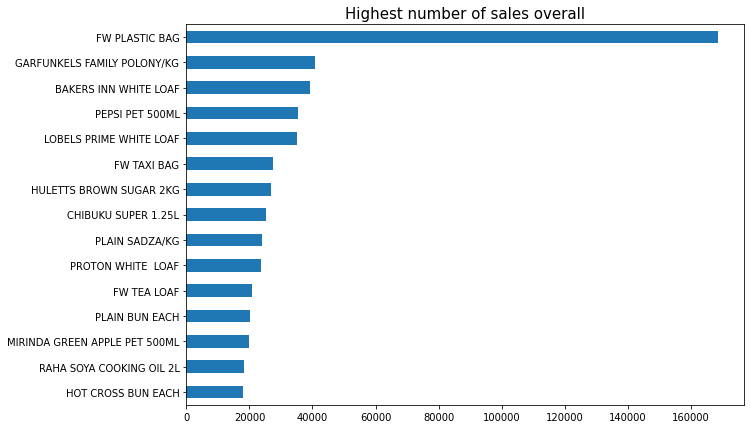

In [ ]:
fig = plt.figure(figsize = (10, 7))
df['Product Name'].value_counts().sort_values(ascending=False).head(15).plot(kind = 'barh').invert_yaxis()
plt.title('Highest number of sales overall', fontdict={'size': 15})

The items that sell fastest are:

* FW PLASTIC BAG
* GARFUNKELS FAMILY POLONY/KG
* BAKERS INN WHITE LOAF
* PEPSI PET 500ML
* LOBELS PRIME WHITE LOAF

### Times of the day

* What times of the day can we bring more till operators to the tills ?

In [ ]:
df['Hour'] = pd.to_datetime(df['Date and Time']).dt.hour

In [ ]:
print('Working hours: ' + str(df['Hour'].min()) + ' AM to ' + str(df['Hour'].max()) + ' PM')

Working hours: 5 AM to 22 PM


In [ ]:
hours = df['Hour'].value_counts().sort_values(ascending=False).index.tolist()

In [ ]:
sales = df['Hour'].value_counts().sort_values(ascending=False)

In [ ]:
peek_hours = pd.DataFrame(data=list(zip(hours, sales)),columns=['Hours','Sales'])

In [ ]:
!pip install peakutils

In [ ]:
import peakutils
from peakutils.plot import plot as pplot

15    4691
Name: Sales, dtype: int64 15    21
Name: Hours, dtype: int64


Text(0.5, 1.0, 'Peek Hours')

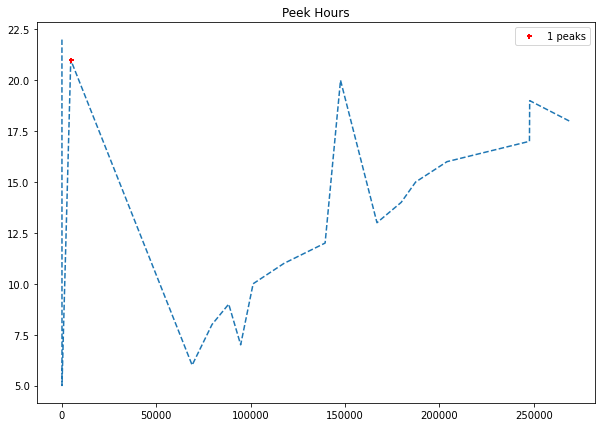

In [ ]:
x = peek_hours.Sales
y = peek_hours.Hours
indexes = peakutils.indexes(y, thres=0.5, min_dist=30)
print(x[indexes], y[indexes])
plt.figure(figsize=(10,7))
pplot(x, y, indexes)
plt.title('Peek Hours')

* Looks like Peek Hours start from around 1500 HRS up to 2100 HRS. We can we bring more till operators to the tills from this time.

Let's see the how sales increase from 1500 HRS.

Text(0.5, 1.0, 'Times with highest sales')

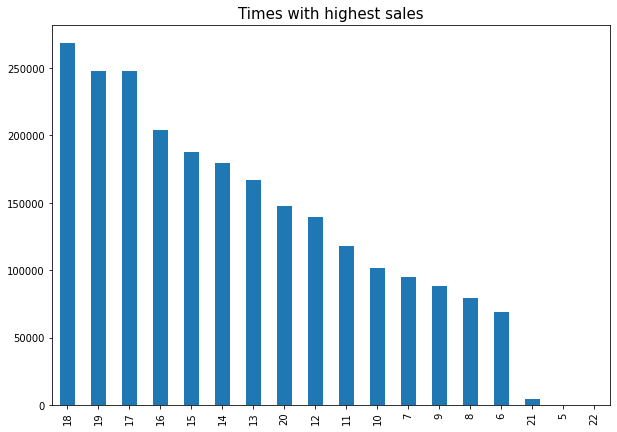

In [ ]:
fig = plt.figure(figsize = (10, 7))
df['Hour'].value_counts().sort_values(ascending=False).plot(kind = 'bar')
plt.title('Times with highest sales', fontdict={'size': 15})

* Looks like sales increase from 1500 HRS to 1900 HRS, and then starts slowing down to extremely low sales in 2100 HRS and close of day at 2200 HRS. So definitely get more till operators from 1500 HRS to work to 1900 HRS, then they can reduce.

## Data Analysis

### Training Data

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
# remove whitespaces
df['Product Name'] = df['Product Name'].str.strip()

In [ ]:
# lower case normalization
df['Product Name'] = df['Product Name'].str.lower() 

In [ ]:
# remove negative quantities
df = df[df['Quantity Sold']>0]

In [ ]:
# Group the transactions
basket = pd.pivot_table(data=df,index='Trans No',columns='Product Name',values='Quantity Sold', \
                        aggfunc='sum',fill_value=0)

In [ ]:
basket.head()

Product Name,1.5l jug with 4 tumblers,10lt bucket recycle virgin,12can lq soft cooler bag,12inch butter cream cake,12inch choc sponge,12inch rect fresh cream cake,12inch rectangle black forest cake,12inch rectangle plain sponge,16 slices choc ganache,1lt glass bottle,20lt bucket with lid+handle rec,20x20 butter cream cake,25x25 butter cream cake,30x30 butter cream cake,350ml plastic cups 10s,4 plate gas stove with oven e039,4th street rose 3l,4th street sweet red 750ml,4th street sweet rose 750ml,4th street sweet white 750ml,4way extension single switch 9802,6 inch red velvet cake,6inch butter cream cake,6inch decorated cake,6inch vanilla sponge,7 up can 330ml,7 up pet 2ltr,7 up pet 500ml,8inch butter cream cake,8inch choc sponge,8inch plain sponge,9l open bucket,a petals tissue 4pack,a5 manuscript bk 96pg f/m,a5 short hand 100pg centre line,acacia green bar 1kg,academy beginners pencil,academy lion pencil hb,accura permanet marker ass,ace porridge banana flavour 1kg,...,yolo drinking yog vanilla 250ml,yomilk yoghurt strawberry 200ml,yomilk yoghurt vanilla 200ml,yummy peach yoghurt 500ml,yummy yoghurt banana 500ml,yummy yoghurt banana 100ml,yummy yoghurt banana 150ml,yummy yoghurt banana 1l,yummy yoghurt peach 100ml,yummy yoghurt peach 150ml,yummy yoghurt pineapple 150ml,yummy yoghurt strawberry 500ml,yummy yoghurt strawberry 100ml,yummy yoghurt strawberry 150ml,yummy yoghurt strawberry 1l,yummy yoghurt vanilla 150ml,zambezi can 330ml,zambezi can 440ml,zambezi magnum 660ml,zambezi nrb dumpy 340ml,zambezi pint 340ml,zambezi pops van/ban/st 48 units,zapnax beef 100g,zapnax extreme cheese 150g,zapnax extreme smokey beef 150g,zb zesa token,zimbabwe independent,zimbrite laundry bar 1kg,zimgold cooking oil 2l,zimgold cooking oil 500ml,zimgold cooking oil 5l,zimgold cooking oil 750ml,zimgold margarine brick 500g,zimgold pure soyabean oil 2ltr,zlg flavoured drink orange 500ml,zlg purified water 2l,zlg purified water 500ml,zlg purified water 5lt,zviyo meal 1kg,zviyo meal 2kg
Trans No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,7,2,0,0,0,1,0,0,0,1,4,0,0,...,0,0,0,0,0,0,2,0,0,0,0,1,0,5,0,0,6,1,1,5,0,0,0,0,0,870,0,1,5,0,1,0,11,0,0,4,43,0,0,0
3,0,0,0,3,0,1,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,2,0,0,3,0,6,2,0,0,0,0,0,0,0,1,2,0,1,...,0,0,0,0,0,1,2,0,0,1,0,0,1,0,0,0,2,0,0,6,0,0,0,0,0,1195,0,2,15,0,1,0,16,1,0,9,12,1,0,0
4,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,3,2,0,0,0,0,0,0,0,1,15,0,0,...,0,0,0,0,1,0,3,0,0,1,0,0,2,7,0,1,6,3,0,0,0,0,0,0,0,1773,1,7,15,0,0,0,11,2,0,5,26,1,0,1
5,0,0,0,2,0,1,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,1,0,0,5,0,3,4,0,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,6,0,0,3,0,0,0,5,0,1,0,0,1,2,1,0,0,0,0,3510,0,2,14,0,0,0,15,0,0,4,27,2,1,0


In [ ]:
# encode quantities (1 for at least one product, 0 for none)
def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
basket_sets = basket.applymap(convert_into_binary) # one-hot encoding

In [ ]:
basket_sets.head()

Product Name,1.5l jug with 4 tumblers,10lt bucket recycle virgin,12can lq soft cooler bag,12inch butter cream cake,12inch choc sponge,12inch rect fresh cream cake,12inch rectangle black forest cake,12inch rectangle plain sponge,16 slices choc ganache,1lt glass bottle,20lt bucket with lid+handle rec,20x20 butter cream cake,25x25 butter cream cake,30x30 butter cream cake,350ml plastic cups 10s,4 plate gas stove with oven e039,4th street rose 3l,4th street sweet red 750ml,4th street sweet rose 750ml,4th street sweet white 750ml,4way extension single switch 9802,6 inch red velvet cake,6inch butter cream cake,6inch decorated cake,6inch vanilla sponge,7 up can 330ml,7 up pet 2ltr,7 up pet 500ml,8inch butter cream cake,8inch choc sponge,8inch plain sponge,9l open bucket,a petals tissue 4pack,a5 manuscript bk 96pg f/m,a5 short hand 100pg centre line,acacia green bar 1kg,academy beginners pencil,academy lion pencil hb,accura permanet marker ass,ace porridge banana flavour 1kg,...,yolo drinking yog vanilla 250ml,yomilk yoghurt strawberry 200ml,yomilk yoghurt vanilla 200ml,yummy peach yoghurt 500ml,yummy yoghurt banana 500ml,yummy yoghurt banana 100ml,yummy yoghurt banana 150ml,yummy yoghurt banana 1l,yummy yoghurt peach 100ml,yummy yoghurt peach 150ml,yummy yoghurt pineapple 150ml,yummy yoghurt strawberry 500ml,yummy yoghurt strawberry 100ml,yummy yoghurt strawberry 150ml,yummy yoghurt strawberry 1l,yummy yoghurt vanilla 150ml,zambezi can 330ml,zambezi can 440ml,zambezi magnum 660ml,zambezi nrb dumpy 340ml,zambezi pint 340ml,zambezi pops van/ban/st 48 units,zapnax beef 100g,zapnax extreme cheese 150g,zapnax extreme smokey beef 150g,zb zesa token,zimbabwe independent,zimbrite laundry bar 1kg,zimgold cooking oil 2l,zimgold cooking oil 500ml,zimgold cooking oil 5l,zimgold cooking oil 750ml,zimgold margarine brick 500g,zimgold pure soyabean oil 2ltr,zlg flavoured drink orange 500ml,zlg purified water 2l,zlg purified water 500ml,zlg purified water 5lt,zviyo meal 1kg,zviyo meal 2kg
Trans No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,1,1,1,0,1
5,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1,0


In [ ]:
basket_sets.shape

(2525, 4985)

In [ ]:
basket_sets.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2525, 2526, 2527, 2528, 2529, 2531, 2533, 2534, 2535, 2536],
           dtype='int64', name='Trans No', length=2525)

In [ ]:
basket_sets.columns

Index(['1.5l jug with 4 tumblers', '10lt bucket recycle virgin',
       '12can lq soft cooler bag', '12inch butter cream cake',
       '12inch choc sponge', '12inch rect fresh cream cake',
       '12inch rectangle black forest cake', '12inch rectangle plain sponge',
       '16 slices choc ganache', '1lt glass bottle',
       ...
       'zimgold cooking oil 5l', 'zimgold cooking oil 750ml',
       'zimgold margarine brick 500g', 'zimgold pure soyabean oil  2ltr',
       'zlg flavoured drink orange 500ml', 'zlg purified water 2l',
       'zlg purified water 500ml', 'zlg purified water 5lt', 'zviyo meal 1kg',
       'zviyo meal 2kg'],
      dtype='object', name='Product Name', length=4985)

In [ ]:
basket_sets.iloc[0]

Product Name
1.5l jug with 4 tumblers      0
10lt bucket recycle virgin    0
12can lq soft cooler bag      0
12inch butter cream cake      0
12inch choc sponge            0
                             ..
zlg purified water 2l         0
zlg purified water 500ml      0
zlg purified water 5lt        0
zviyo meal 1kg                0
zviyo meal 2kg                0
Name: 1, Length: 4985, dtype: int64

In [ ]:
basket_sets.iloc[0].sum()

62

In [ ]:
# save file to drive
with open(path+'basket_sets.csv', 'w') as f:
  basket_sets.to_csv(f)